In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams.update({'font.size': 14})
from scipy.stats import linregress
from scipy.stats import pearsonr, spearmanr
from scipy.stats import ranksums
from scipy.stats import ttest_ind
from scipy.spatial import distance
from glob import glob
from sklearn.metrics import mean_squared_error

In [2]:
#pd.set_option('display.max_columns', None)
#pd.set_option("max_rows", None)

In [3]:
#load info
Patient_Info = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_info.csv', index_col=0)

In [4]:
#load initial file
Initial_relative = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_relative.txt', index_col=0)
Initial_relative.index = Initial_relative.index.map(lambda x: str(x)[:-2])

In [5]:
#load recurrence file
Recurrence_relative = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/recurrence_relative.txt', index_col=0)
Recurrence_relative.index = Recurrence_relative.index.map(lambda x: str(x)[:-2])

In [6]:
#load info
initial_gene = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/pairedGlioma.initial.expression.protein_cod.log2RPKM.txt', sep='\t', index_col=0)
initial_gene = initial_gene.T
initial_gene.index = initial_gene.index.map(lambda x: str(x)[:-2])
initial_gene

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
PS001,0.322194,0.000887,8.474165,0.214947,0.354009,1.230164,0.155758,3.490316,1.316954,0.055590,...,2.548419,2.847793,2.126169,2.360479,2.725091,0.040484,4.011957,6.530712,3.339430,3.409634
PS002,0.046524,0.020182,7.932872,0.115775,1.047151,0.832239,0.282275,2.944802,1.235938,0.006160,...,2.535253,3.057632,1.887034,2.408481,3.099876,0.127986,4.178815,7.396621,3.445534,3.510258
PS003,0.069776,0.073363,7.432975,0.579277,0.503432,0.877112,0.081326,3.499517,0.991083,0.001362,...,1.810134,1.763021,2.187577,2.392960,3.566120,0.031058,3.735626,6.360853,3.919491,3.493802
PS004,0.087898,0.009340,7.992288,0.802002,0.255035,1.878284,0.030338,3.210685,0.885269,0.000094,...,0.550298,1.104706,2.196133,2.270942,3.484471,0.626191,3.769631,7.361941,3.571827,2.632745
PS005,0.359374,0.064059,7.968155,0.865592,0.184223,0.378405,0.077970,3.063487,0.973098,0.043815,...,2.305857,2.387947,2.290157,2.178121,2.983156,0.112762,4.509771,6.847077,3.224891,3.470250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSX08,0.140245,0.038351,6.812783,1.405271,0.167836,1.118234,0.051918,3.018705,1.391969,0.001851,...,1.332148,1.690496,1.486260,2.330306,2.592944,0.033938,3.805096,4.630435,2.800361,2.852385
PSX07,0.288546,0.151314,5.679800,0.138256,0.689481,0.505129,0.006498,2.581349,1.514374,0.006498,...,2.871320,4.181237,1.506046,2.282706,2.869557,0.006498,3.265812,6.755331,3.363743,2.821824
PSX01,0.175047,0.003846,7.549660,1.855640,0.003846,2.714165,0.358712,3.213100,1.124916,0.139253,...,2.519610,3.470250,1.849501,2.454381,2.425886,0.089193,3.499165,5.041788,2.683307,2.748271
PSX14,0.055856,0.041085,7.261907,1.790860,0.250851,1.331037,0.087555,2.452307,1.475816,0.002259,...,1.660000,1.207815,1.375349,2.145834,2.283018,0.062606,4.266303,3.713855,2.525556,3.183371


In [7]:
#select for marker genes
initial_gene_marker = initial_gene.loc[:,["CD274", "CD276", "TIGIT", "CTLA4", "LAG3"]]
initial_gene_marker

,CD274,CD276,TIGIT,CTLA4,LAG3
PS001,1.472278,4.772543,0.315841,0.173197,0.485652
PS002,2.051646,5.260646,0.485520,0.258477,0.333174
PS003,0.755056,3.928446,0.431292,0.065133,0.464144
PS004,0.684904,5.166042,0.174110,0.022755,1.565530
PS005,1.238825,3.954937,0.792146,0.064946,0.047007
...,...,...,...,...,...
PSX08,0.938153,3.669498,0.135191,0.047081,0.359163
PSX07,1.393014,4.076615,1.655312,1.527212,2.243386
PSX01,1.338790,4.867574,0.396605,0.343002,0.380508
PSX14,0.822076,2.384911,0.187708,0.053944,0.242329


In [8]:
#load info
recurrence_gene = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/pairedGlioma.recurrence.expression.protein_cod.log2RPKM.txt', sep='\t', index_col=0)
recurrence_gene = recurrence_gene.T
recurrence_gene.index = recurrence_gene.index.map(lambda x: str(x)[:-2])
recurrence_gene_marker = recurrence_gene.loc[:,["CD274", "CD276", "TIGIT", "CTLA4", "LAG3"]]
recurrence_gene_marker

,CD274,CD276,TIGIT,CTLA4,LAG3
PS001,1.602864,2.933100,0.183388,0.063488,0.090015
PS002,1.469374,3.989884,0.440523,0.125214,0.221634
PS003,1.409281,2.385818,0.270369,0.170619,0.269184
PS004,1.495229,3.964536,0.544729,0.254121,0.391261
PS005,1.752375,3.999686,0.619595,0.042285,0.204907
...,...,...,...,...,...
PSX08,1.105747,6.377725,0.046577,0.002504,0.466744
PSX02,0.608545,5.393867,0.166183,0.003739,0.548272
PSX05,0.997293,1.876992,0.181302,0.132632,0.369965
PSX13,0.899219,2.417921,0.203791,0.003936,0.640227


In [9]:
#add patient info for the ones with initial data
common = initial_gene_marker.index.intersection(Patient_Info.index)
common2 = recurrence_gene_marker.index.intersection(Patient_Info.index)
final_common = recurrence_gene_marker.index.intersection(initial_gene_marker.index)
final_common

Index(['PS001', 'PS002', 'PS003', 'PS004', 'PS005', 'PS006', 'PS007', 'PS008',
       'PS009', 'PS010',
       ...
       'PSX20', 'PSX18', 'PSX01', 'PSX14', 'PSX07', 'PSX09', 'PSX08', 'PSX02',
       'PSX05', 'PSX13'],
      dtype='object', length=181)

In [10]:
combined_data = Patient_Info
combined_data = combined_data[combined_data.index.isin(final_common)]
Grade1 = combined_data.loc[:, combined_data.columns == "Grade_1"]
Grade2 = combined_data.loc[:, combined_data.columns == "Grade_2"]
grade_data = Grade1.join(Grade2)
grade_data

,Grade_1,Grade_2
Patient_ID,,
PS001,IV,IV
PS002,IV,IV
PS003,IV,IV
PS004,IV,IV
PS005,IV,IV
...,...,...
PSX15,IV,IV
PSX16,IV,IV
PSX17,IV,IV


In [11]:
select = grade_data[(grade_data['Grade_1']=="IV")&(grade_data['Grade_2']=="IV")]
grade_data.loc[select.index, 'Progression'] = "Recurrence"
select2 = grade_data[(grade_data['Grade_2']=="II")]
select3 = grade_data[(grade_data['Grade_2']=="III")]
grade_data.loc[select2.index, 'Progression'] = "No Progression"
grade_data.loc[select3.index, 'Progression'] = "No Progression"
grade_data = grade_data.fillna("Progression")
grade_data

,Grade_1,Grade_2,Progression
Patient_ID,,,
PS001,IV,IV,Recurrence
PS002,IV,IV,Recurrence
PS003,IV,IV,Recurrence
PS004,IV,IV,Recurrence
PS005,IV,IV,Recurrence
...,...,...,...
PSX15,IV,IV,Recurrence
PSX16,IV,IV,Recurrence
PSX17,IV,IV,Recurrence


In [12]:
#CD274
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "CD274"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "CD274"]
recurrence.columns = ['Recurrent']
CD274_data = initial.join(recurrence)
CD274_data

,Initial,Recurrent
PS001,1.472278,1.602864
PS002,2.051646,1.469374
PS003,0.755056,1.409281
PS004,0.684904,1.495229
PS005,1.238825,1.752375
...,...,...
PSX13,0.913464,0.899219
PSX08,0.938153,1.105747
PSX07,1.393014,0.410247
PSX01,1.338790,2.766985


In [13]:
CD274_final = pd.concat([grade_data, CD274_data], axis=1)
CD274_final.index.name = 'Mixture'
CD274_final = CD274_final.drop(['Grade_1', 'Grade_2'], axis=1)
CD274_final = CD274_final.sort_values(by='Mixture')
CD274_final

,Progression,Initial,Recurrent
Mixture,,,
PS001,Recurrence,1.472278,1.602864
PS002,Recurrence,2.051646,1.469374
PS003,Recurrence,0.755056,1.409281
PS004,Recurrence,0.684904,1.495229
PS005,Recurrence,1.238825,1.752375
...,...,...,...
PSX15,Recurrence,0.543017,1.077238
PSX16,Recurrence,1.144218,1.041614
PSX17,Recurrence,0.591339,1.483817


In [14]:
CD274_mdf = pd.melt(CD274_final.reset_index(), id_vars=('Mixture','Progression'))
CD274_mdf

,Mixture,Progression,variable,value
0,PS001,Recurrence,Initial,1.472278
1,PS002,Recurrence,Initial,2.051646
2,PS003,Recurrence,Initial,0.755056
3,PS004,Recurrence,Initial,0.684904
4,PS005,Recurrence,Initial,1.238825
...,...,...,...,...
357,PSX15,Recurrence,Recurrent,1.077238
358,PSX16,Recurrence,Recurrent,1.041614
359,PSX17,Recurrence,Recurrent,1.483817
360,PSX18,Recurrence,Recurrent,1.238825


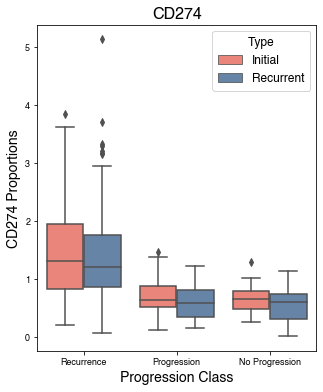

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#FC766AFF","#5B84B1FF"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(5,6))
plt.title("CD274", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Progression', y='value',hue="variable", data=CD274_mdf)
ax.set_xlabel("Progression Class", fontsize=14)
ax.set_ylabel("CD274 Proportions", fontsize=14)  
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [16]:
progression = ['Recurrence','Progression','No Progression']
for p in progression:
    specific_progression = CD274_mdf.loc[CD274_mdf['Progression'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

Recurrence
Between Initial and Recurrence: 
RanksumsResult(statistic=0.6758286128059177, pvalue=0.4991494660060475)
--------------------------------
Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=1.5196991905317072, pvalue=0.1285865951483346)
--------------------------------
No Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=0.7511240429008323, pvalue=0.45257800738959064)
--------------------------------


In [17]:
#CD276
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "CD276"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "CD276"]
recurrence.columns = ['Recurrent']
CD276_data = initial.join(recurrence)
CD276_data

,Initial,Recurrent
PS001,4.772543,2.933100
PS002,5.260646,3.989884
PS003,3.928446,2.385818
PS004,5.166042,3.964536
PS005,3.954937,3.999686
...,...,...
PSX13,3.098980,2.417921
PSX08,3.669498,6.377725
PSX07,4.076615,4.202625
PSX01,4.867574,5.078166


In [18]:
CD276_final = pd.concat([grade_data, CD276_data], axis=1)
CD276_final.index.name = 'Mixture'
CD276_final = CD276_final.drop(['Grade_1', 'Grade_2'], axis=1)
CD276_final = CD276_final.sort_values(by='Mixture')
CD276_final

,Progression,Initial,Recurrent
Mixture,,,
PS001,Recurrence,4.772543,2.933100
PS002,Recurrence,5.260646,3.989884
PS003,Recurrence,3.928446,2.385818
PS004,Recurrence,5.166042,3.964536
PS005,Recurrence,3.954937,3.999686
...,...,...,...
PSX15,Recurrence,3.318199,4.123369
PSX16,Recurrence,4.935861,4.264816
PSX17,Recurrence,3.373691,3.851216


In [19]:
CD276_mdf = pd.melt(CD276_final.reset_index(), id_vars=('Mixture','Progression'))
CD276_mdf

,Mixture,Progression,variable,value
0,PS001,Recurrence,Initial,4.772543
1,PS002,Recurrence,Initial,5.260646
2,PS003,Recurrence,Initial,3.928446
3,PS004,Recurrence,Initial,5.166042
4,PS005,Recurrence,Initial,3.954937
...,...,...,...,...
357,PSX15,Recurrence,Recurrent,4.123369
358,PSX16,Recurrence,Recurrent,4.264816
359,PSX17,Recurrence,Recurrent,3.851216
360,PSX18,Recurrence,Recurrent,5.041788


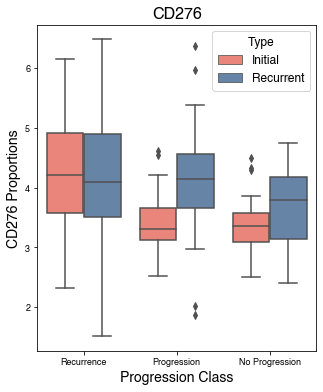

In [20]:
plt.figure(figsize=(5,6))
plt.title("CD276", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Progression', y='value',hue="variable", data=CD276_mdf)
ax.set_xlabel("Progression Class", fontsize=14)
ax.set_ylabel("CD276 Proportions", fontsize=14)  
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [21]:
progression = ['Recurrence','Progression','No Progression']
for p in progression:
    specific_progression = CD276_mdf.loc[CD276_mdf['Progression'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

Recurrence
Between Initial and Recurrence: 
RanksumsResult(statistic=1.2660983603077614, pvalue=0.2054778695923818)
--------------------------------
Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=-3.501079147807224, pvalue=0.0004633782037477137)
--------------------------------
No Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=-1.6900290965268727, pvalue=0.09102238821888048)
--------------------------------


In [22]:
#TIGIT
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "TIGIT"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "TIGIT"]
recurrence.columns = ['Recurrent']
TIGIT_data = initial.join(recurrence)
TIGIT_final = pd.concat([grade_data, TIGIT_data], axis=1)
TIGIT_final.index.name = 'Mixture'
TIGIT_final = TIGIT_final.drop(['Grade_1', 'Grade_2'], axis=1)
TIGIT_final = TIGIT_final.sort_values(by='Mixture')
TIGIT_mdf = pd.melt(TIGIT_final.reset_index(), id_vars=('Mixture','Progression'))
TIGIT_mdf

,Mixture,Progression,variable,value
0,PS001,Recurrence,Initial,0.315841
1,PS002,Recurrence,Initial,0.485520
2,PS003,Recurrence,Initial,0.431292
3,PS004,Recurrence,Initial,0.174110
4,PS005,Recurrence,Initial,0.792146
...,...,...,...,...
357,PSX15,Recurrence,Recurrent,0.218800
358,PSX16,Recurrence,Recurrent,0.150737
359,PSX17,Recurrence,Recurrent,0.558967
360,PSX18,Recurrence,Recurrent,0.266565


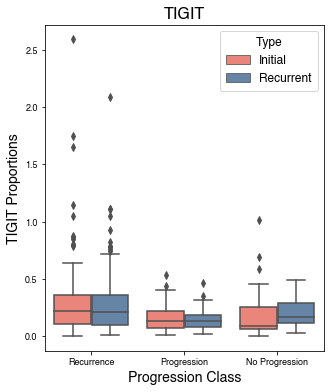

In [23]:
plt.figure(figsize=(5,6))
plt.title("TIGIT", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Progression', y='value',hue="variable", data=TIGIT_mdf)
ax.set_xlabel("Progression Class", fontsize=14)
ax.set_ylabel("TIGIT Proportions", fontsize=14)  
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [24]:
progression = ['Recurrence','Progression','No Progression']
for p in progression:
    specific_progression = TIGIT_mdf.loc[TIGIT_mdf['Progression'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

Recurrence
Between Initial and Recurrence: 
RanksumsResult(statistic=-0.30334506789626225, pvalue=0.7616269039330192)
--------------------------------
Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=0.5258030954582278, pvalue=0.5990250235925336)
--------------------------------
No Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=-0.9389050536260404, pvalue=0.34777949432808886)
--------------------------------


In [25]:
#CTLA4
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "CTLA4"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "CTLA4"]
recurrence.columns = ['Recurrent']
CTLA4_data = initial.join(recurrence)
CTLA4_final = pd.concat([grade_data, CTLA4_data], axis=1)
CTLA4_final.index.name = 'Mixture'
CTLA4_final = CTLA4_final.drop(['Grade_1', 'Grade_2'], axis=1)
CTLA4_final = CTLA4_final.sort_values(by='Mixture')
CTLA4_mdf = pd.melt(CTLA4_final.reset_index(), id_vars=('Mixture','Progression'))
CTLA4_mdf

,Mixture,Progression,variable,value
0,PS001,Recurrence,Initial,0.173197
1,PS002,Recurrence,Initial,0.258477
2,PS003,Recurrence,Initial,0.065133
3,PS004,Recurrence,Initial,0.022755
4,PS005,Recurrence,Initial,0.064946
...,...,...,...,...
357,PSX15,Recurrence,Recurrent,0.063553
358,PSX16,Recurrence,Recurrent,0.003727
359,PSX17,Recurrence,Recurrent,0.195614
360,PSX18,Recurrence,Recurrent,0.292211


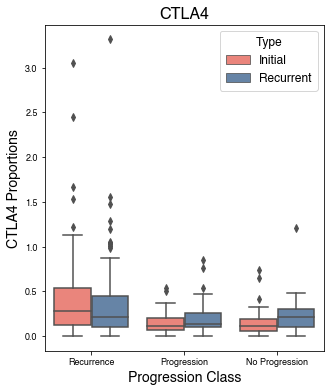

In [26]:
plt.figure(figsize=(5,6))
plt.title("CTLA4", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Progression', y='value',hue="variable", data=CTLA4_mdf)
ax.set_xlabel("Progression Class", fontsize=14)
ax.set_ylabel("CTLA4 Proportions", fontsize=14)  
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [27]:
progression = ['Recurrence','Progression','No Progression']
for p in progression:
    specific_progression = CTLA4_mdf.loc[CTLA4_mdf['Progression'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

Recurrence
Between Initial and Recurrence: 
RanksumsResult(statistic=1.2228868121743905, pvalue=0.22137245026189878)
--------------------------------
Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=-1.5838215192461251, pvalue=0.11323434081250346)
--------------------------------
No Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=-1.6900290965268727, pvalue=0.09102238821888048)
--------------------------------


In [28]:
#LAG3
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "LAG3"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "LAG3"]
recurrence.columns = ['Recurrent']
LAG3_data = initial.join(recurrence)
LAG3_final = pd.concat([grade_data, LAG3_data], axis=1)
LAG3_final.index.name = 'Mixture'
LAG3_final = LAG3_final.drop(['Grade_1', 'Grade_2'], axis=1)
LAG3_final = LAG3_final.sort_values(by='Mixture')
LAG3_mdf = pd.melt(LAG3_final.reset_index(), id_vars=('Mixture','Progression'))
LAG3_mdf

,Mixture,Progression,variable,value
0,PS001,Recurrence,Initial,0.485652
1,PS002,Recurrence,Initial,0.333174
2,PS003,Recurrence,Initial,0.464144
3,PS004,Recurrence,Initial,1.565530
4,PS005,Recurrence,Initial,0.047007
...,...,...,...,...
357,PSX15,Recurrence,Recurrent,1.195702
358,PSX16,Recurrence,Recurrent,0.470177
359,PSX17,Recurrence,Recurrent,1.201889
360,PSX18,Recurrence,Recurrent,0.260357


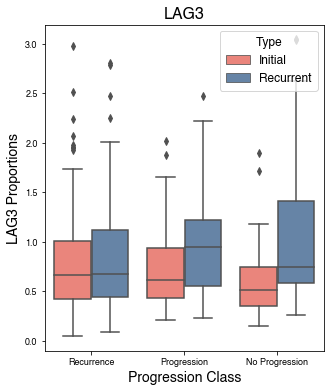

In [29]:
plt.figure(figsize=(5,6))
plt.title("LAG3", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Progression', y='value',hue="variable", data=LAG3_mdf)
ax.set_xlabel("Progression Class", fontsize=14)
ax.set_ylabel("LAG3 Proportions", fontsize=14)  
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [30]:
progression = ['Recurrence','Progression','No Progression']
for p in progression:
    specific_progression = LAG3_mdf.loc[TIGIT_mdf['Progression'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

Recurrence
Between Initial and Recurrence: 
RanksumsResult(statistic=-0.361248542394979, pvalue=0.7179136571240893)
--------------------------------
Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=-1.8916086970753316, pvalue=0.05854313626235956)
--------------------------------
No Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=-2.394207886746403, pvalue=0.016656305210212025)
--------------------------------
